In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_netflix_final = pd.read_csv("C:/Users/Usuario/Documents/Adalab49/Módulo 4/Proyecto_Módulo 4_Tableau/analisis_netflix.csv")

In [3]:
df_netflix_final.sample(10)

,type,title,director,country,release_year,age_rating,genre,rating,stars,votes,month_added,year_added,duration_min,seasons
3628,TV Show,the house of flowers,Not Given,Mexico,2020,TV-MA,International TV Shows,7.6,Cecilia Suárez,7884,4,2020,0,3
2859,TV Show,dream home makeover,Not Given,United States,2021,TV-G,Reality TV,5.6,Shea McGee,1267,1,2021,0,2
3622,TV Show,love 101,Not Given,Turkey,2020,TV-MA,International TV Shows,7.7,Ahmet Katiksiz,419,4,2020,0,1
448,Movie,the soul,Cheng Wei-hao,China,2021,TV-MA,Dramas,6.6,Wei-Hao Cheng,2889,4,2021,130,0
1703,Movie,rocco,"Thierry Demaizière, Alban Teurlai",France,2016,TV-MA,Documentaries,5.7,Thierry Demaizière,4101,9,2017,103,0
2853,TV Show,cobra kai,Not Given,United States,2021,TV-14,TV Action & Adventure,9.0,Steven K. Tsuchida,4152,1,2021,0,3
713,Movie,the paramedic,Carles Torras,Spain,2020,TV-MA,Dramas,5.7,Carles Torras,12685,9,2020,94,0
2164,Movie,spy kids,Robert Rodriguez,United States,2001,PG,Children & Family Movies,5.6,Robert Rodriguez,117739,4,2019,88,0
4153,TV Show,raising dion,Not Given,United States,2019,TV-PG,Kids' TV,7.1,Alisha Wainwright,15055,10,2019,0,1
4663,TV Show,retribution,Not Given,United Kingdom,2016,TV-MA,British TV Shows,7.0,Joanna Vanderham,8444,1,2018,0,1


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26608\2818429717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_netflix_final, palette='viridis')


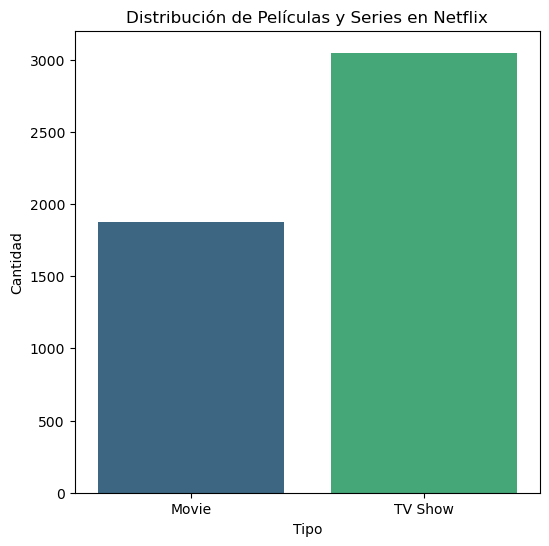

In [4]:
# Gráfico
plt.figure(figsize=(6,6))
sns.countplot(x='type', data=df_netflix_final, palette='viridis')
plt.title('Distribución de Películas y Series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

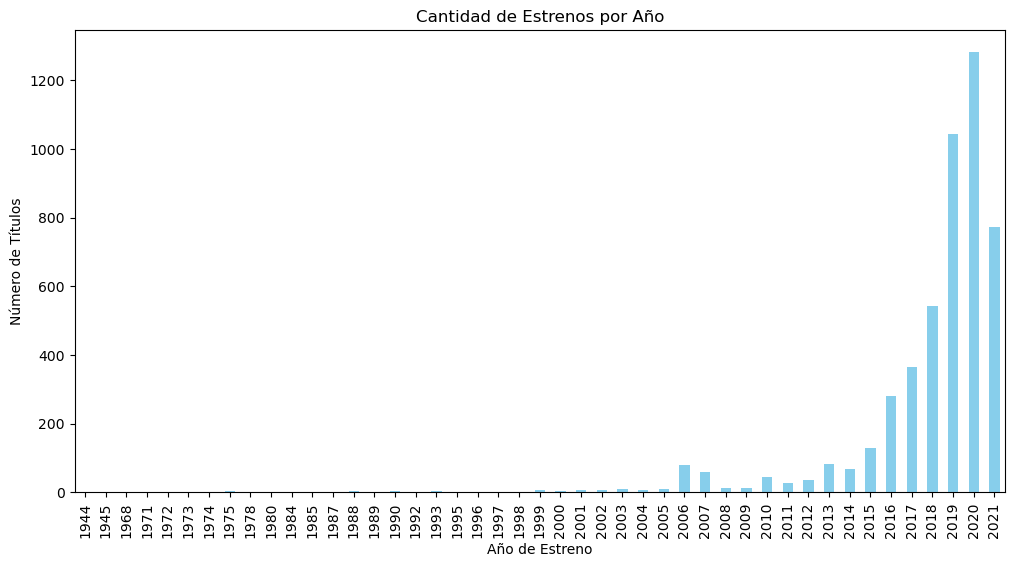

In [5]:
plt.figure(figsize=(12,6))
df_netflix_final['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Estrenos por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Títulos')
plt.show()

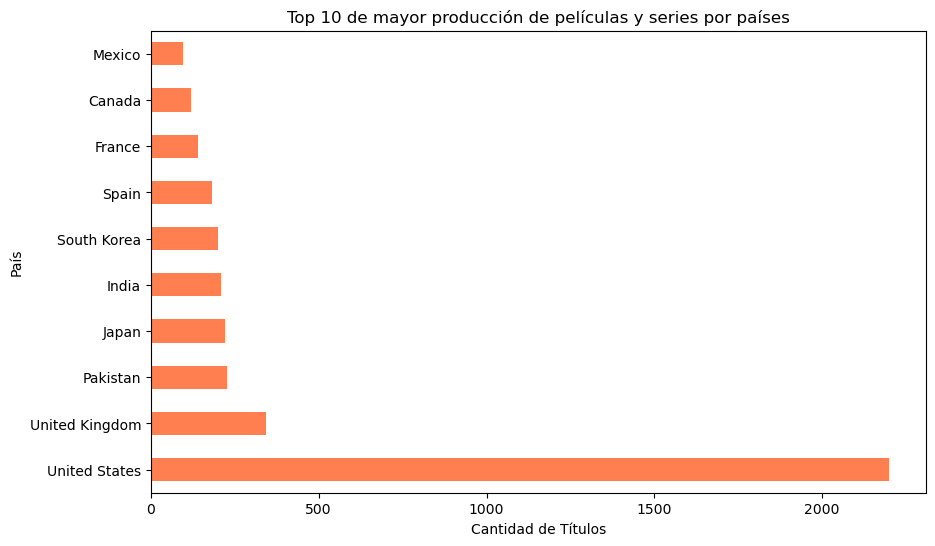

In [6]:
plt.figure(figsize=(10,6))
df_netflix_final['country'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 de mayor producción de películas y series por países")
plt.xlabel('Cantidad de Títulos')
plt.ylabel('País')
plt.show()

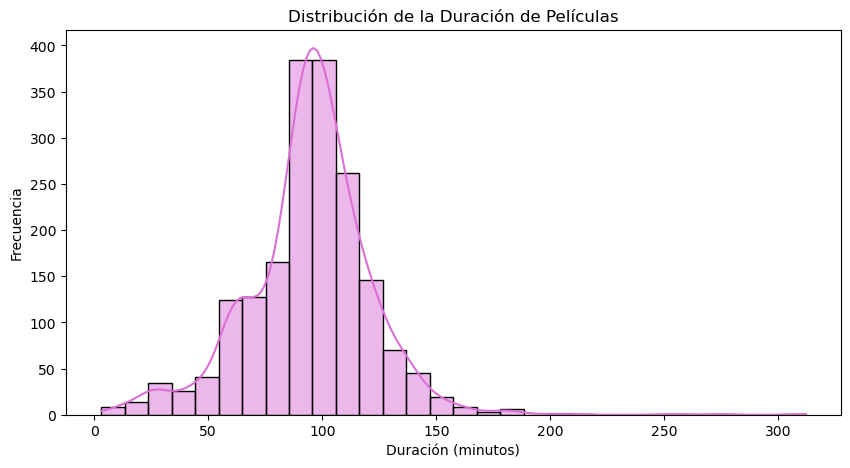

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df_netflix_final[df_netflix_final['duration_min'] > 0]['duration_min'], bins=30, kde=True, color='orchid')
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

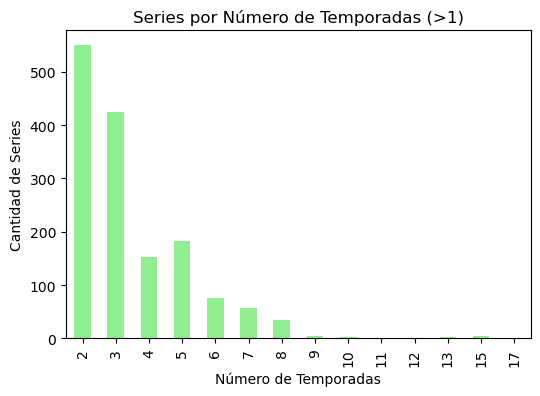

In [8]:
plt.figure(figsize=(6,4))
df_netflix_final[df_netflix_final['seasons'] > 1]['seasons'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Series por Número de Temporadas (>1)')
plt.xlabel('Número de Temporadas')
plt.ylabel('Cantidad de Series')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26608\1780478272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df_netflix_final, order=df_netflix_final['rating'].value_counts().index, palette='coolwarm')


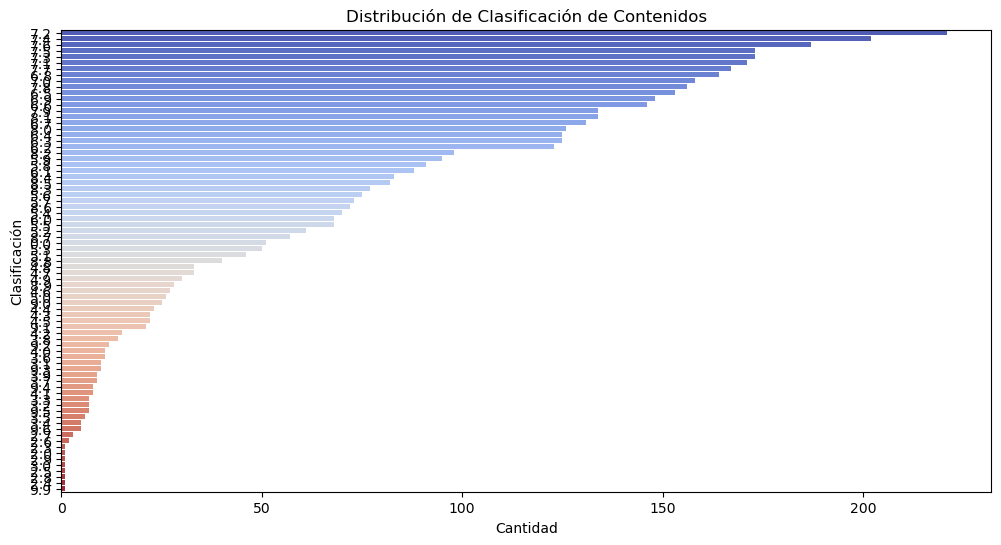

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(y='rating', data=df_netflix_final, order=df_netflix_final['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribución de Clasificación de Contenidos')
plt.xlabel('Cantidad')
plt.ylabel('Clasificación')
plt.show()

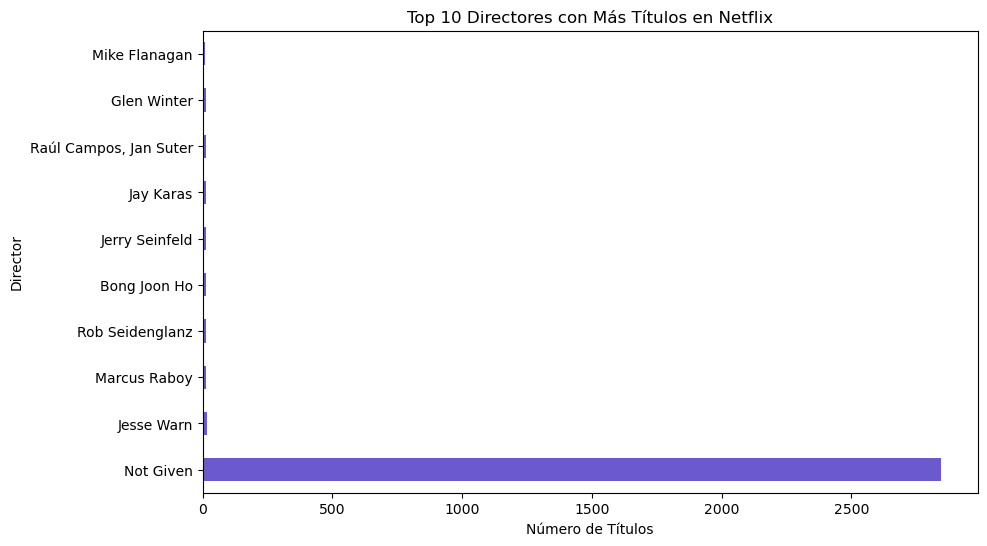

In [10]:
plt.figure(figsize=(10,6))
df_netflix_final['director'].value_counts().head(10).plot(kind='barh', color='slateblue')
plt.title('Top 10 Directores con Más Títulos en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Director')
plt.show()

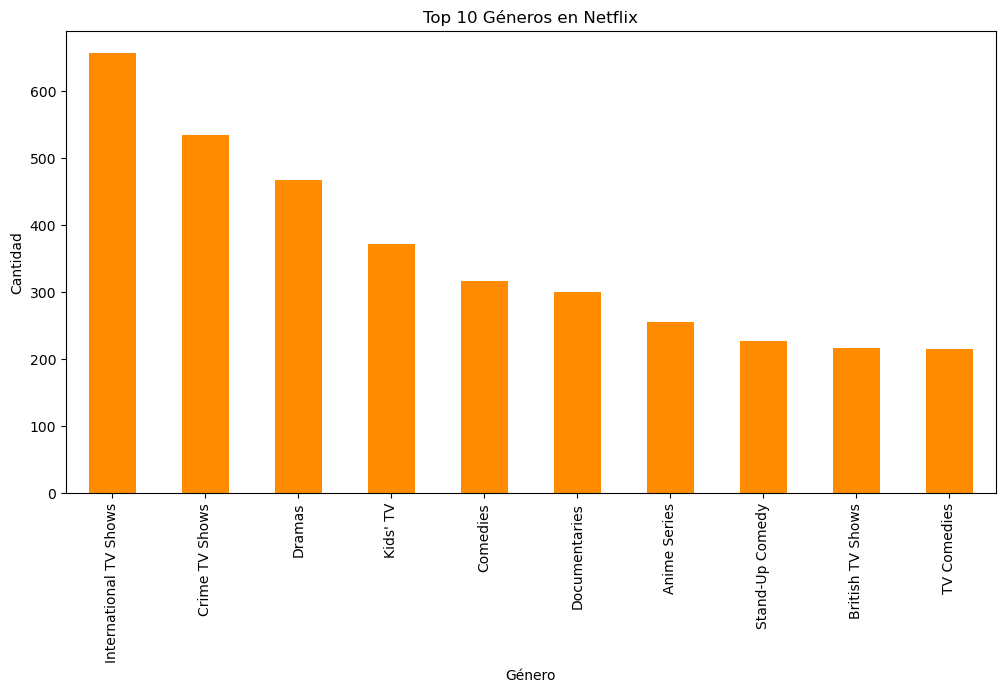

In [11]:
plt.figure(figsize=(12,6))
df_netflix_final['genre'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title('Top 10 Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

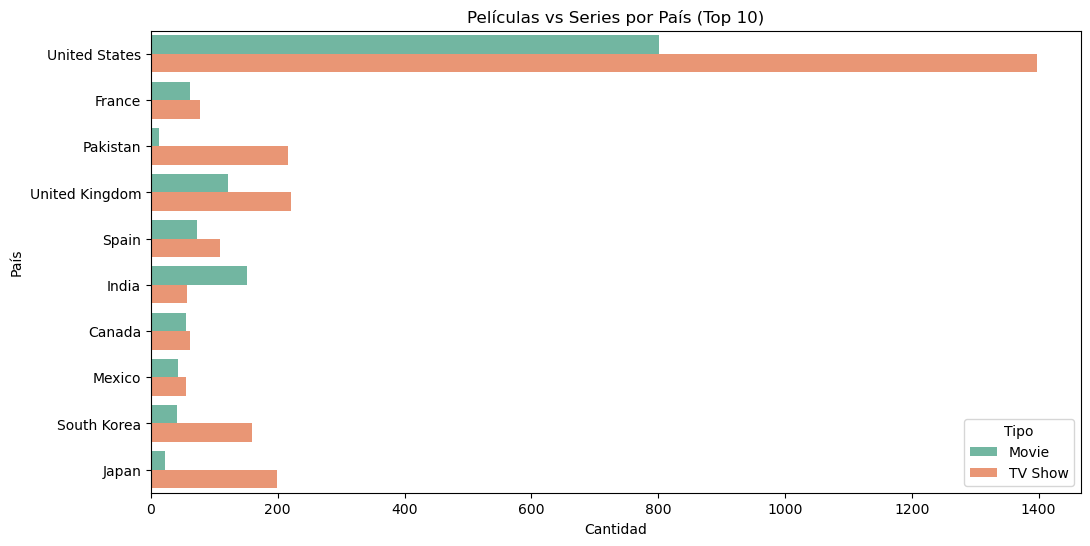

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=df_netflix_final[df_netflix_final['country'].notnull() & df_netflix_final['country'].isin(df_netflix_final['country'].value_counts().head(10).index)], palette='Set2')
plt.title('Películas vs Series por País (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()

In [15]:
df_netflix_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          4919 non-null   object 
 1   title         4919 non-null   object 
 2   director      4919 non-null   object 
 3   country       4919 non-null   object 
 4   release_year  4919 non-null   int64  
 5   age_rating    4919 non-null   object 
 6   genre         4919 non-null   object 
 7   rating        4919 non-null   float64
 8   stars         4857 non-null   object 
 9   votes         4919 non-null   int64  
 10  month_added   4919 non-null   int64  
 11  year_added    4919 non-null   int64  
 12  duration_min  4919 non-null   int64  
 13  seasons       4919 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 538.1+ KB


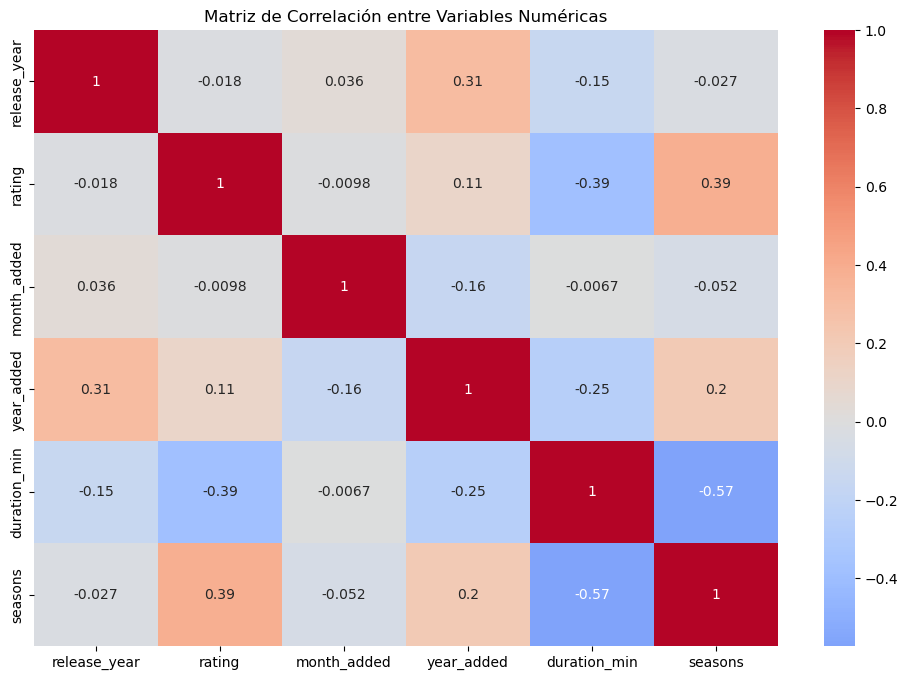

In [16]:
# Seleccionar variables numéricas relevantes
numeric_cols = ['release_year', 'rating', 'month_added',
                'year_added', 'duration_min', 'seasons']

plt.figure(figsize=(12, 8))
sns.heatmap(df_netflix_final[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

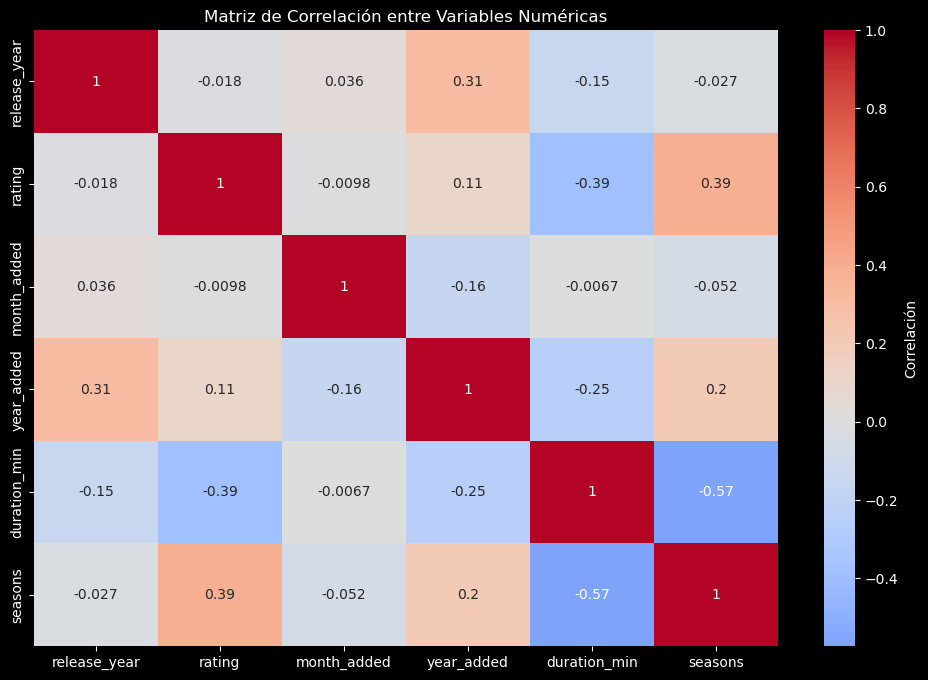

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

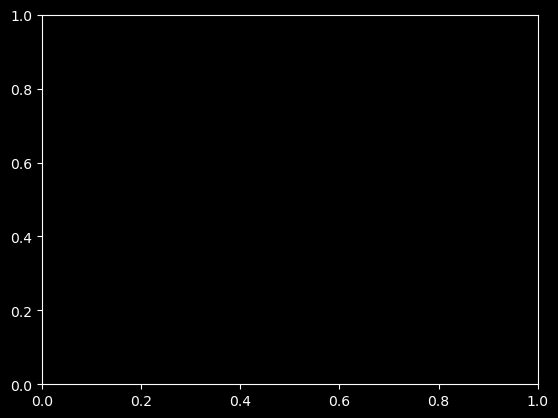

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas relevantes
numeric_cols = ['release_year', 'rating', 'month_added',
                'year_added', 'duration_min', 'seasons']

# Configurar fondo negro
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
sns.heatmap(df_netflix_final[numeric_cols].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            cbar_kws={'label': 'Correlación'})  # Opcional: etiqueta de barra de color

plt.title('Matriz de Correlación entre Variables Numéricas', color='white')
plt.show()
plt.xticks(color='white')
plt.yticks(color='white')

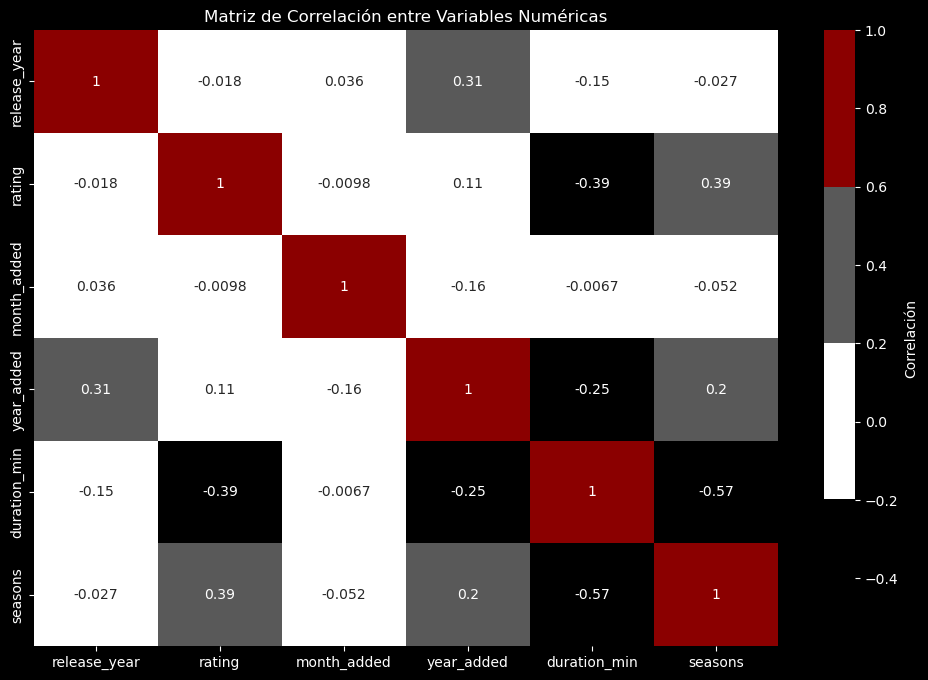

In [19]:
# Seleccionar variables numéricas relevantes
numeric_cols = ['release_year', 'rating', 'month_added',
                'year_added', 'duration_min', 'seasons']

# Paleta personalizada Netflix
netflix_palette = ['#E50914', '#000000', '#FFFFFF', '#595959', '#8B0000']

# Fondo negro
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
# Usando cmap de dos tonos básicos para que no choque, puedes personalizar más con 'coolwarm' o mapas discretos
sns.heatmap(df_netflix_final[numeric_cols].corr(),
            annot=True,
            cmap=sns.color_palette(netflix_palette, as_cmap=True),
            center=0,
            cbar_kws={'label': 'Correlación'})

plt.title('Matriz de Correlación entre Variables Numéricas', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()